In [1]:
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### R3.1 Spatial Resolution

In [2]:
# 100 % accuracy, no plot needed

### R3.2 Temporal Resolution

In [3]:
r3_2 = pd.read_csv('R3_2.csv')

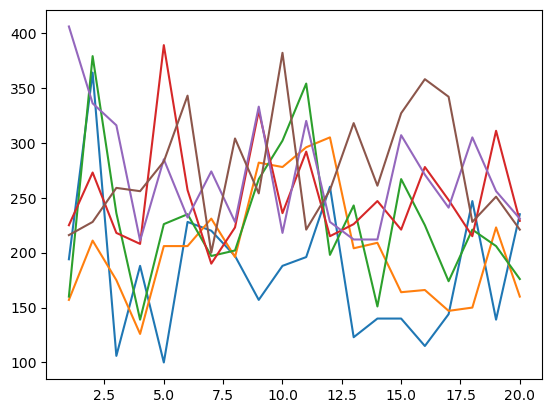

In [4]:
fig, ax = plt.subplots()
ax.plot(r3_2['Trial'], r3_2['a_control'], label='A Control')
ax.plot(r3_2['Trial'], r3_2['c_control'], label='C Control')
ax.plot(r3_2['Trial'], r3_2['k_control'], label='K Control')
ax.plot(r3_2['Trial'], r3_2['a_bladder'], label='A Bladder')
ax.plot(r3_2['Trial'], r3_2['c_bladder'], label='C Bladder')
ax.plot(r3_2['Trial'], r3_2['k_bladder'], label='K Bladder')

In [5]:
# calculate std
a_control_std = np.std(r3_2['a_control'])
c_control_std = np.std(r3_2['c_control'])
k_control_std = np.std(r3_2['k_control'])
a_bladder_std = np.std(r3_2['a_bladder'])
c_bladder_std = np.std(r3_2['c_bladder'])
k_bladder_std = np.std(r3_2['k_bladder'])

a_std = [a_control_std, a_bladder_std]
c_std = [c_control_std, c_bladder_std]
k_std = [k_control_std, k_bladder_std]

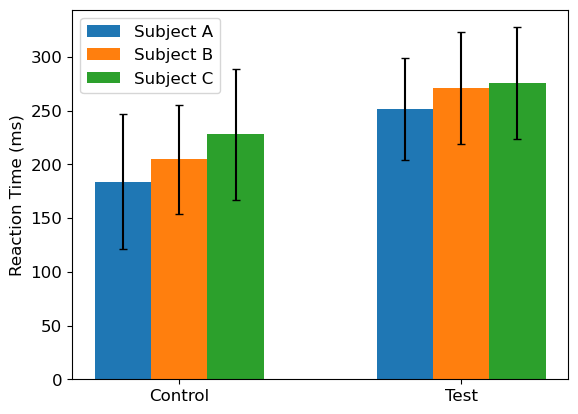

In [36]:
fig, ax = plt.subplots()

n = np.arange(2)
w = 0.2
xticks = ['Control', 'Test']
font = {'size': 12}
matplotlib.rc('font', **font)

ax.bar(n, (np.mean(r3_2['a_control']), np.mean(r3_2['a_bladder'])), label='Subject A', yerr=a_std, capsize=3, width=w)
ax.bar(n+w, (np.mean(r3_2['c_control']), np.mean(r3_2['c_bladder'])), label='Subject B', yerr=c_std, capsize=3, width=w)
ax.bar(n+2*w, (np.mean(r3_2['k_control']), np.mean(r3_2['k_bladder'])), label='Subject C', yerr=k_std, capsize=3, width=w)
ax.set(xticks=n+w, xticklabels=xticks)
ax.legend()
ax.set(ylabel='Reaction Time (ms)')
plt.show()

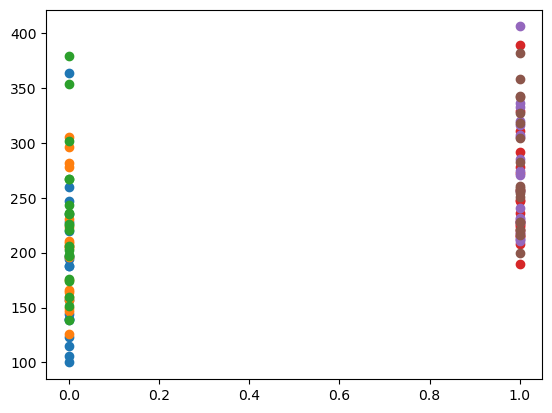

In [7]:
x1 = np.zeros(20)
x2 = np.ones(20)
plt.scatter(x1, r3_2['a_control'], label='A Control')
plt.scatter(x1, r3_2['c_control'], label='C Control')
plt.scatter(x1, r3_2['k_control'], label='K Control')

plt.scatter(x2, r3_2['a_bladder'], label='A Control')
plt.scatter(x2, r3_2['c_bladder'], label='C Control')
plt.scatter(x2, r3_2['k_bladder'], label='K Control')

In [8]:
# levene's test for equal variance
from scipy.stats import levene
print(levene(r3_2['a_control'], r3_2['a_bladder'], center='trimmed'))
print(levene(r3_2['c_control'], r3_2['c_bladder'], center='trimmed'))
print(levene(r3_2['k_control'], r3_2['k_bladder'], center='trimmed'))
# this means that the variances are not equal, so we should use the welch's t-test

LeveneResult(statistic=2.8788593147991657, pvalue=0.09888783265371347)
LeveneResult(statistic=0.19816764703088222, pvalue=0.6590253563840145)
LeveneResult(statistic=0.078744735991411, pvalue=0.7807062736632585)


In [17]:
# calculate variance:
a_control_var = np.var(r3_2['a_control'])
c_control_var = np.var(r3_2['c_control'])
k_control_var = np.var(r3_2['k_control'])
a_bladder_var = np.var(r3_2['a_bladder'])
c_bladder_var = np.var(r3_2['c_bladder'])
k_bladder_var = np.var(r3_2['k_bladder'])

print('A Control Variance:', a_control_var)
print('C Control Variance:', c_control_var)
print('K Control Variance:', k_control_var)
print('A Bladder Variance:', a_bladder_var)
print('C Bladder Variance:', c_bladder_var)
print('K Bladder Variance:', k_bladder_var)

A Control Variance: 3913.5474999999997
C Control Variance: 2586.64
K Control Variance: 3735.4900000000007
A Bladder Variance: 2231.15
C Bladder Variance: 2734.5900000000006
K Bladder Variance: 2720.7475000000004


In [16]:
# calculate t-test
from scipy.stats import ttest_ind
a_t = ttest_ind(r3_2['a_control'], r3_2['a_bladder'], alternative='less', equal_var=False)
c_t = ttest_ind(r3_2['c_control'], r3_2['c_bladder'], alternative='less', equal_var=False)
k_t = ttest_ind(r3_2['k_control'], r3_2['k_bladder'], alternative='less', equal_var=False)
print(a_t)
print(c_t)
print(k_t)

TtestResult(statistic=-3.750666941928769, pvalue=0.00031573555536616857, df=35.35000137650387)
TtestResult(statistic=-3.9736757896885724, pvalue=0.000152791220734386, df=37.9706469067998)
TtestResult(statistic=-2.579512119791747, pvalue=0.006996140230088885, df=37.08390983498393)


### R3.3 Proportional Feedback

In [4]:
a = pd.read_csv('R3_3/amanda.csv')
c = pd.read_csv('R3_3/ceili.csv')
k = pd.read_csv('R3_3/kate.csv')

   Trial Perceived Actual  Correct
0      1      High    Med        0
1      2      High   High        1
2      3       Low    Low        1
3      4       Low    Low        1
4      5       Med    Med        1


In [21]:
a_expected = np.zeros(10)
a_response = np.zeros(10)
c_expected = np.zeros(10)
c_response = np.zeros(10)
k_expected = np.zeros(10)
k_response = np.zeros(10)

for i in range(10):
    if a['Actual'][i] == 'Low':
        a_expected[i] = 0
    elif a['Actual'][i] == 'Med':
        a_expected[i] = 1
    else:
        a_expected[i] = 2
    
    if a['Perceived'][i] == 'Low':
        a_response[i] = 0
    elif a['Perceived'][i] == 'Med':
        a_response[i] = 1
    else:
        a_response[i] = 2

    if c['Actual'][i] == 'Low':
        c_expected[i] = 0
    elif c['Actual'][i] == 'Med':
        c_expected[i] = 1
    else:
        c_expected[i] = 2
    
    if c['Perceived'][i] == 'Low':
        c_response[i] = 0
    elif c['Perceived'][i] == 'Med':
        c_response[i] = 1
    else:
        c_response[i] = 2
    
    if k['Actual'][i] == 'Low':
        k_expected[i] = 0
    elif k['Actual'][i] == 'Med':
        k_expected[i] = 1
    else:
        k_expected[i] = 2
    
    if k['Perceived'][i] == 'Low':
        k_response[i] = 0
    elif k['Perceived'][i] == 'Med':
        k_response[i] = 1
    else:
        k_response[i] = 2


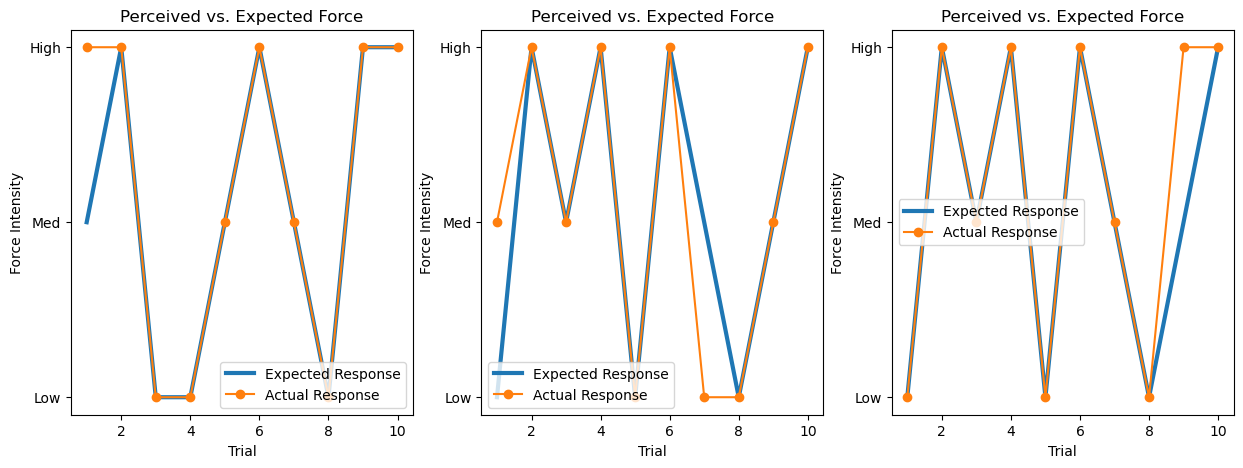

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
trial = np.arange(1, 11, 1)
ax1.plot(trial, a_expected, linewidth=3, label='Expected Response')
ax1.plot(trial, a_response, 'o-', label='Actual Response')
ax1.set(xlabel='Trial', ylabel='Force Intensity', title='Perceived vs. Expected Force')
ax1.set(yticks=[0, 1, 2], yticklabels=['Low', 'Med', 'High'])
ax1.legend()

ax2.plot(trial, c_expected, linewidth=3, label='Expected Response')
ax2.plot(trial, c_response, 'o-', label='Actual Response')
ax2.set(xlabel='Trial', ylabel='Force Intensity', title='Perceived vs. Expected Force')
ax2.set(yticks=[0, 1, 2], yticklabels=['Low', 'Med', 'High'])
ax2.legend()

ax3.plot(trial, k_expected, linewidth=3, label='Expected Response')
ax3.plot(trial, k_response, 'o-', label='Actual Response')
ax3.set(xlabel='Trial', ylabel='Force Intensity', title='Perceived vs. Expected Force')
ax3.set(yticks=[0, 1, 2], yticklabels=['Low', 'Med', 'High'])
ax3.legend()
plt.show()

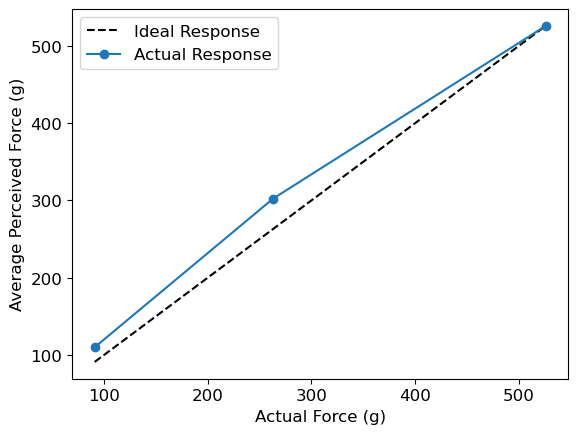

In [33]:
fig, ax = plt.subplots()

avg = [110, 302.3, 526]
actual = [91, 263, 526]
font = {'size': 12}
matplotlib.rc('font', **font)

ax.plot(actual, actual, 'k--', label='Ideal Response')
ax.plot(actual, avg, 'o-', label='Actual Response')
ax.set(xlabel='Actual Force (g)', ylabel='Average Perceived Force (g)')
ax.legend()

plt.show()

In [29]:
# calculate r^2
ss_res = 0
ss_tot = 0

for i in range(3):
    ss_res += (actual[i] - avg[i]) ** 2
    ss_tot += (actual[i] - np.mean(actual)) ** 2

r2 = 1 - (ss_res / ss_tot)
print(r2)

0.9801496294855857


### R5. Average Donning/Doffing Time

In [9]:
r5_1 = pd.read_csv('R5_1.csv')
r5_2 = pd.read_csv('R5_2.csv')
r5_3 = pd.read_csv('R5_3.csv')

In [26]:
# get the std of the data
std_donning = np.std((r5_1['Donning Time (s)'], r5_2['Donning Time (s)'], r5_3['Donning Time (s)']), axis=0)
std_doffing = np.std((r5_1['Doffing Time (s)'], r5_2['Doffing Time (s)'], r5_3['Doffing Time (s)']), axis=0)

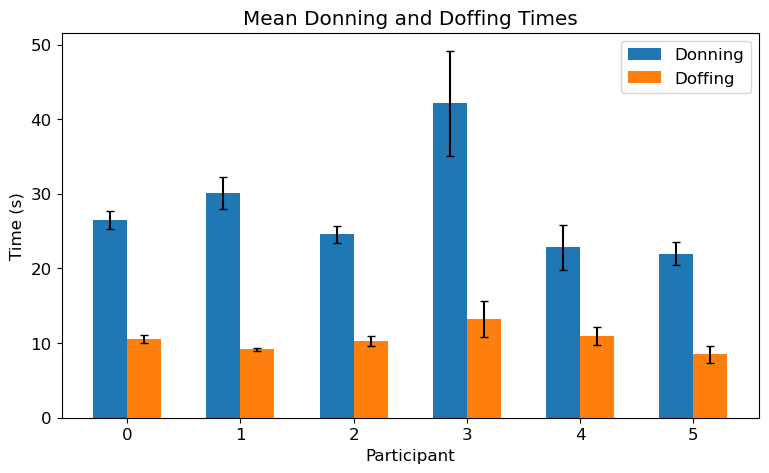

In [33]:
fig, ax = plt.subplots(figsize=(9,5))
w = 0.3
n = np.arange(6)
xticks = np.arange(6)
font = {'size': 12}
matplotlib.rc('font', **font)

ax.bar(n, np.mean((r5_1['Donning Time (s)'], r5_2['Donning Time (s)'], r5_3['Donning Time (s)']), axis=0), width=w, yerr=std_donning, capsize=3, label='Donning')
ax.bar(n+w, np.mean((r5_1['Doffing Time (s)'], r5_2['Doffing Time (s)'], r5_3['Doffing Time (s)']), axis=0), width=w, yerr=std_doffing, capsize=3, label='Doffing')

ax.set(xticks=n+w/2, xticklabels=xticks)
ax.set(xlabel='Participant', ylabel='Time (s)', title='Mean Donning and Doffing Times')
ax.legend()
plt.show()